# **MLP (Multilayer Perceptron) – Tabular Data - RegresiUTSTelkom.csv**

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import gdown
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Load Dataset

In [2]:
file_id = '1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m'
output = 'RegresiUTSTelkom.csv'

# Unduh file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output=output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m&confirm=t
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:06<00:00, 70.2MB/s]


'RegresiUTSTelkom.csv'

# Feature Engineering

In [3]:
df = pd.read_csv(output)
df.columns = ['target'] + [f'feat_{i}' for i in range(1, df.shape[1])]
print("Nama kolom setelah direname:\n", df.columns.tolist()[:10])


Nama kolom setelah direname:
 ['target', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9']


In [4]:
# Ubah target ke float
df['target'] = df['target'].astype(float)


In [5]:
print("\nInfomasi Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe().T)


Infomasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   515344 non-null  float64
 1   feat_1   515344 non-null  float64
 2   feat_2   515344 non-null  float64
 3   feat_3   515344 non-null  float64
 4   feat_4   515344 non-null  float64
 5   feat_5   515344 non-null  float64
 6   feat_6   515344 non-null  float64
 7   feat_7   515344 non-null  float64
 8   feat_8   515344 non-null  float64
 9   feat_9   515344 non-null  float64
 10  feat_10  515344 non-null  float64
 11  feat_11  515344 non-null  float64
 12  feat_12  515344 non-null  float64
 13  feat_13  515344 non-null  float64
 14  feat_14  515344 non-null  float64
 15  feat_15  515344 non-null  float64
 16  feat_16  515344 non-null  float64
 17  feat_17  515344 non-null  float64
 18  feat_18  515344 non-null  float64
 19  feat_19  515344 non-null  float64
 20  feat_20

In [6]:
print("Jumlah data duplikat:", int(df.duplicated().sum()))
df = df.drop_duplicates(keep='first')

Jumlah data duplikat: 214


In [7]:
X = df.drop(columns='target')
y = df['target']

var_selector = VarianceThreshold(threshold=0.0)
X_var_filtered = var_selector.fit_transform(X)

# Simpan nama fitur yang lolos seleksi
selected_features = X.columns[var_selector.get_support()]
print(f"\nJumlah fitur setelah filter varian: {len(selected_features)} dari {X.shape[1]}")



Jumlah fitur setelah filter varian: 90 dari 90


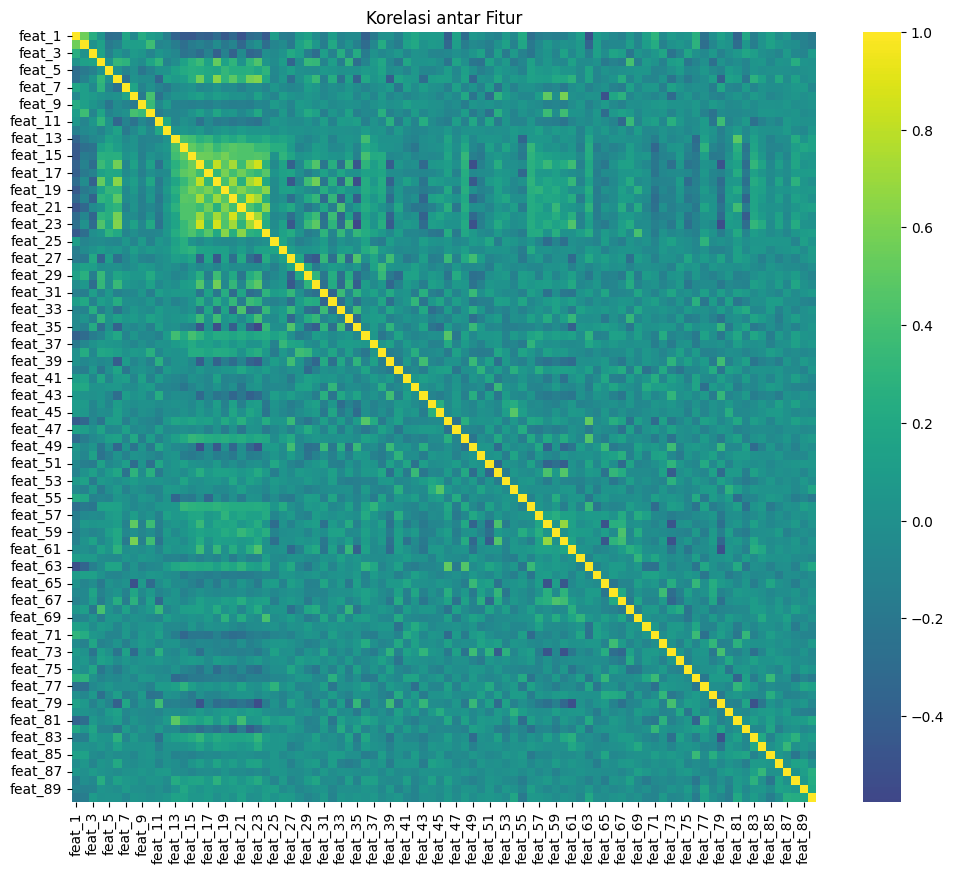

In [9]:
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', center=0)  # Changed cmap here
plt.title("Korelasi antar Fitur")
plt.show()

In [10]:
cor_with_target = df[selected_features].corrwith(df['target'])
cor_sorted = cor_with_target.sort_values(key=np.abs, ascending=False)

top_features = cor_sorted.head(10).index.tolist()
print("\nTop 10 fitur dengan korelasi tertinggi terhadap target:")
print(cor_sorted.head(10))



Top 10 fitur dengan korelasi tertinggi terhadap target:
feat_1     0.225345
feat_6    -0.187441
feat_3    -0.139575
feat_63   -0.126319
feat_40   -0.123996
feat_7     0.110461
feat_67   -0.102841
feat_46   -0.101340
feat_36   -0.101050
feat_69   -0.099486
dtype: float64


In [11]:
print("\nMenentukan Outlier Berdasarkan IQR:")
for col in selected_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outlier")



Menentukan Outlier Berdasarkan IQR:
feat_1: 10620 outlier
feat_2: 14641 outlier
feat_3: 15626 outlier
feat_4: 22677 outlier
feat_5: 10454 outlier
feat_6: 11987 outlier
feat_7: 13902 outlier
feat_8: 14532 outlier
feat_9: 15393 outlier
feat_10: 6234 outlier
feat_11: 15795 outlier
feat_12: 13600 outlier
feat_13: 18665 outlier
feat_14: 26216 outlier
feat_15: 20560 outlier
feat_16: 24665 outlier
feat_17: 20035 outlier
feat_18: 21404 outlier
feat_19: 17744 outlier
feat_20: 25453 outlier
feat_21: 21140 outlier
feat_22: 19183 outlier
feat_23: 23799 outlier
feat_24: 20371 outlier
feat_25: 41976 outlier
feat_26: 40178 outlier
feat_27: 45578 outlier
feat_28: 38293 outlier
feat_29: 35697 outlier
feat_30: 32354 outlier
feat_31: 32658 outlier
feat_32: 36288 outlier
feat_33: 32742 outlier
feat_34: 36856 outlier
feat_35: 32965 outlier
feat_36: 31179 outlier
feat_37: 46174 outlier
feat_38: 34204 outlier
feat_39: 31256 outlier
feat_40: 33024 outlier
feat_41: 36633 outlier
feat_42: 32232 outlier
feat_43

# Bersihkan Dataset

In [12]:
df_cleaned = df.copy()
for col in selected_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nJumlah data setelah menghapus semua outlier(tidak dipakai): {df_cleaned.shape[0]} dari {df.shape[0]}")



Jumlah data setelah menghapus semua outlier(tidak dipakai): 40127 dari 515130


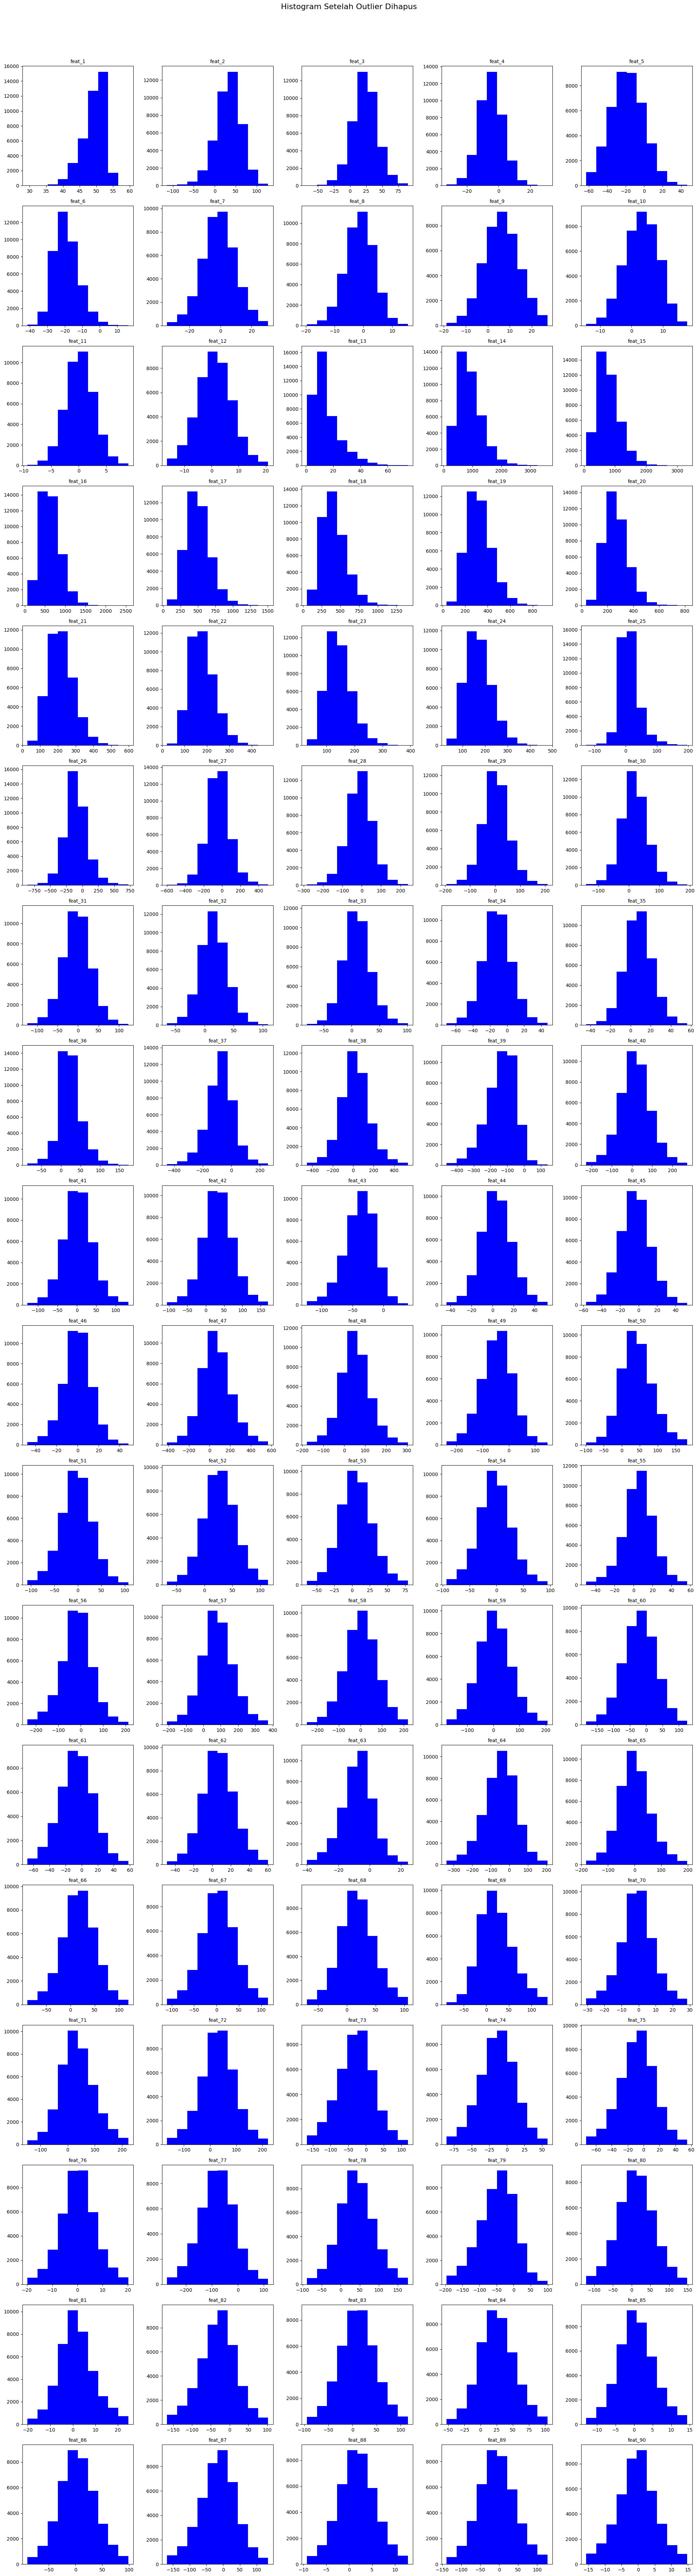

In [17]:
n_features = len(selected_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, col in enumerate(selected_features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df_cleaned[col], color='blue')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.suptitle("Histogram Setelah Outlier Dihapus", fontsize=16, y=1.02)
plt.show()


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[selected_features])  # Menggunakan df_cleaned yang sudah dibersihkan

print("\nX_scaled shape:", X_scaled.shape)



X_scaled shape: (40127, 90)


# Membagi Data Menjadi Training dan Testing Set

In [19]:
X_clean = df_cleaned[selected_features]  # Gunakan df_cleaned untuk X
y_clean = df_cleaned['target']  # Gunakan df_cleaned untuk y

# 11. Membagi Data Menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))



X_train shape: (32101, 90), X_test shape: (8026, 90)


In [20]:
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU terdeteksi!")
else:
    print("GPU tidak terdeteksi.")

# Menampilkan informasi GPU
print("Daftar GPU yang terdeteksi:", physical_devices)


GPU tidak terdeteksi.
Daftar GPU yang terdeteksi: []


# Bangun Model MLP

In [21]:
import tensorflow.keras.backend as K
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Menentukan bentuk input berdasarkan data
    layers.Dense(256, activation='relu'),  # Hidden Layer 1 dengan 256 neuron
    layers.Dense(128, activation='relu'),  # Hidden Layer 2 dengan 128 neuron
    layers.Dense(64, activation='relu'),   # Hidden Layer 3 dengan 64 neuron
    layers.Dense(1)  # Output Layer (untuk regresi, output hanya satu nilai)
])

def rmse_loss(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=rmse_loss, metrics=['mae'])


# Menampilkan ringkasan model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,513 (252.00 KB)

 Trainable params: 64,513 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.8216 - mae: 0.6142 - val_loss: 0.7461 - val_mae: 0.5411
Epoch 2/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7224 - mae: 0.5253 - val_loss: 0.7283 - val_mae: 0.5271
Epoch 3/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6810 - mae: 0.4944 - val_loss: 0.7266 - val_mae: 0.5284
Epoch 4/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6517 - mae: 0.4727 - val_loss: 0.7297 - val_mae: 0.5376
Epoch 5/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6175 - mae: 0.4523 - val_loss: 0.7349 - val_mae: 0.5315
Epoch 6/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5720 - mae: 0.4224 - val_loss: 0.7342 - val_mae: 0.5266
Epoch 7/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5335 - mae: 0.3997 - val_loss: 0.7474 - val_mae: 0.5372
Epoch 8/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4982 - mae: 0.3768 - val_loss: 0.7560 - val_mae: 0.5435
Epoch 9/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - lo

In [23]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\n=====Evaluasi Model=====")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=====Evaluasi Model=====
MSE: 0.6826190903226821
RMSE: 0.8262076556911598
R²: 0.31928366817599063


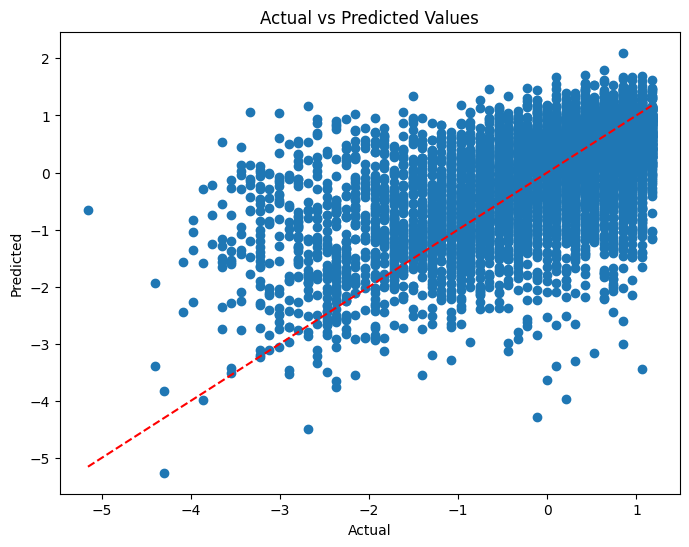

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print("\n=====Evaluasi Klasifikasi Model=====")
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")



=====Evaluasi Klasifikasi Model=====
Threshold: 0.0099
Accuracy : 0.7675
Precision: 0.7983
Recall   : 0.8198
F1 Score : 0.8089
AUC-ROC  : 0.8179


In [27]:
from tensorflow.keras import layers, regularizers, models, optimizers, callbacks

model = models.Sequential([
    layers.InputLayer(input_shape=(90,)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.Dense(1)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan pelatihan saat validasi stagnan
early_stop = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Training
history = model.fit(
    X_train,
    y_train_scaled,  # pastikan sudah diskalakan jika target di-scale
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 1.5791 - mae: 0.8048 - val_loss: 1.0063 - val_mae: 0.5642
Epoch 2/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.0375 - mae: 0.5911 - val_loss: 0.9015 - val_mae: 0.5453
Epoch 3/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.9267 - mae: 0.5718 - val_loss: 0.8156 - val_mae: 0.5435
Epoch 4/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.8369 - mae: 0.5641 - val_loss: 0.7509 - val_mae: 0.5390
Epoch 5/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.7563 - mae: 0.5501 - val_loss: 0.6937 - val_mae: 0.5279
Epoch 6/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.7122 - mae: 0.5439 - val_loss: 0.6652 - val_mae: 0.5169
Epoch 7/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.6976 - mae: 0.5414 - val_loss: 0.6648 - val_mae: 0.5294
Epoch 8/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6576 - mae: 0.5317 - val_loss: 0.6505 - val_mae: 0.5135
Epoch 9/50
1806/1806 ━━━━━━━━━━━━━━

In [29]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\n=====Evaluasi Model=====")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

=====Evaluasi Model=====
MSE: 0.5386124446255978
RMSE: 0.733902203720358
R²: 0.46288890425407947


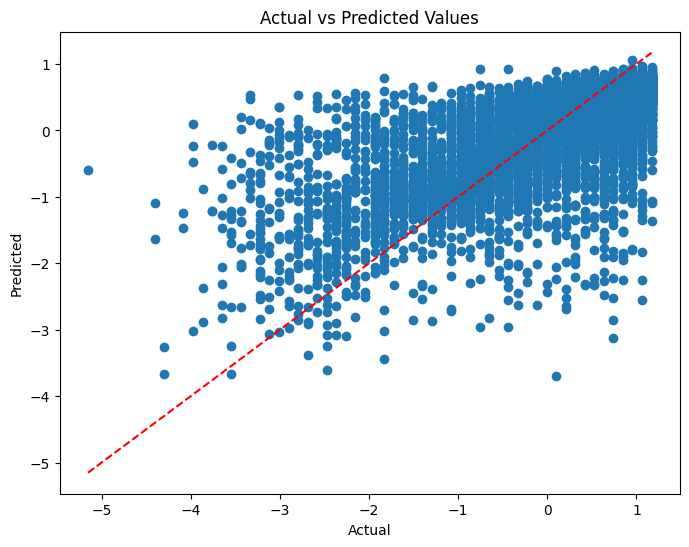

In [30]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [31]:
from tensorflow.keras import Model, Input, layers, regularizers

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Block 1
x = layers.Dense(512, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Block 2
x1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.3)(x1)

# Block 3
x2 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Dropout(0.3)(x2)

# Residual Connection: gabungkan x1 dan x2
res = layers.Concatenate()([x1, x2])
x3 = layers.Dense(64, activation='relu')(res)
x3 = layers.Dropout(0.2)(x3)

# Output
output = layers.Dense(1)(x3)

# Model
model = Model(inputs=input_layer, outputs=output)

# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 90)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 512)       │     46,592 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │    131,328 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_11[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ dropout_4[0][0],  │
│ (Concatenate)       │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │     24,640 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         65 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 239,105 (934.00 KB)

 Trainable params: 237,313 (927.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [33]:
history = model.fit(
    X_train,
    y_train_scaled,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 2.2426 - mae: 0.9927 - val_loss: 1.1303 - val_mae: 0.5885
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.1945 - mae: 0.6238 - val_loss: 1.0248 - val_mae: 0.5536
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.0352 - mae: 0.5649 - val_loss: 0.9478 - val_mae: 0.5446
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.9331 - mae: 0.5477 - val_loss: 0.8600 - val_mae: 0.5398
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.8226 - mae: 0.5279 - val_loss: 0.7805 - val_mae: 0.5251
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 0.7548 - mae: 0.5235 - val_loss: 0.7537 - val_mae: 0.5340
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.6894 - mae: 0.5159 - val_loss: 0.6857 - val_mae: 0.5161
Epoch 8/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.6541 - mae: 0.5161 - val_loss: 0.6543 - val_mae: 0.5225
Epoch 9/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 12s 18

In [34]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\n=====Evaluasi Model=====")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

=====Evaluasi Model=====
MSE: 0.5546881334287218
RMSE: 0.7447738807374503
R²: 0.4468580254393162


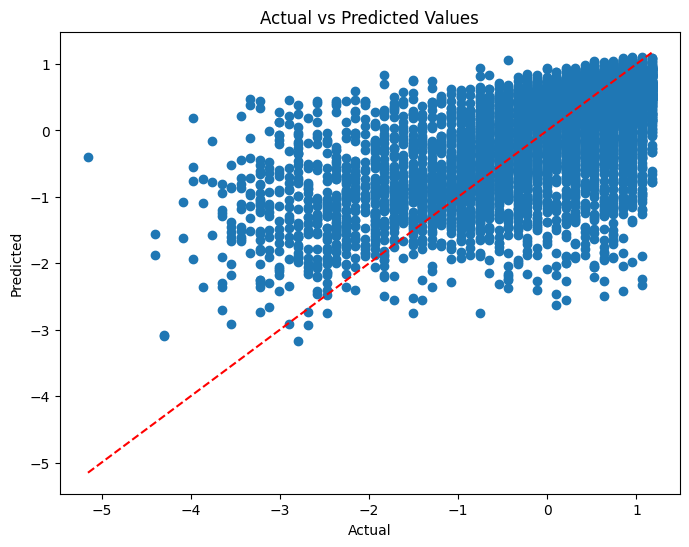

In [35]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print("\n=====Evaluasi Klasifikasi Model=====")
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")



=====Evaluasi Klasifikasi Model=====
Threshold: 0.0099
Accuracy : 0.7898
Precision: 0.8183
Recall   : 0.8352
F1 Score : 0.8267
AUC-ROC  : 0.8586


# Tuning

In [41]:
# === 1. Install Keras Tuner ===
!pip install -q keras-tuner

# === 2. Import ===
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers

# === 3. Buat fungsi model ===
def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001)
        ))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 5e-4])
        ),
        loss='mse',
        metrics=['mae']
    )
    return model


In [43]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='mlp_tuning'
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train_scaled,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Trial 10 Complete [00h 01m 00s]
val_loss: 0.6023156642913818

Best val_loss So Far: 0.5911270380020142
Total elapsed time: 00h 23m 47s


In [47]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Buat ulang model dengan best hyperparameters
final_model = build_model(best_hps)
final_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 192)            │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,305 (165.25 KB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = final_model.fit(
    X_train,
    y_train_scaled,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.8301 - mae: 0.5733 - val_loss: 0.7557 - val_mae: 0.5503
Epoch 2/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.7336 - mae: 0.5439 - val_loss: 0.7025 - val_mae: 0.5373
Epoch 3/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7074 - mae: 0.5456 - val_loss: 0.6675 - val_mae: 0.5362
Epoch 4/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6620 - mae: 0.5339 - val_loss: 0.6543 - val_mae: 0.5392
Epoch 5/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.6230 - mae: 0.5241 - val_loss: 0.6392 - val_mae: 0.5331
Epoch 6/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.6070 - mae: 0.5180 - val_loss: 0.6301 - val_mae: 0.5320
Epoch 7/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5871 - mae: 0.5151 - val_loss: 0.6294 - val_mae: 0.5309
Epoch 8/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5636 - mae: 0.5055 - val_loss: 0.6283 - val_mae: 0.5257
Epoch 9/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step -

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prediksi pada test set
y_pred = final_model.predict(X_test).flatten()



# MSE, RMSE, R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print("\n=====Evaluasi Model pada Test Set=====")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")



251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=====Evaluasi Model pada Test Set=====
MSE  : 0.5539
RMSE : 0.7443
R²   : 0.4476


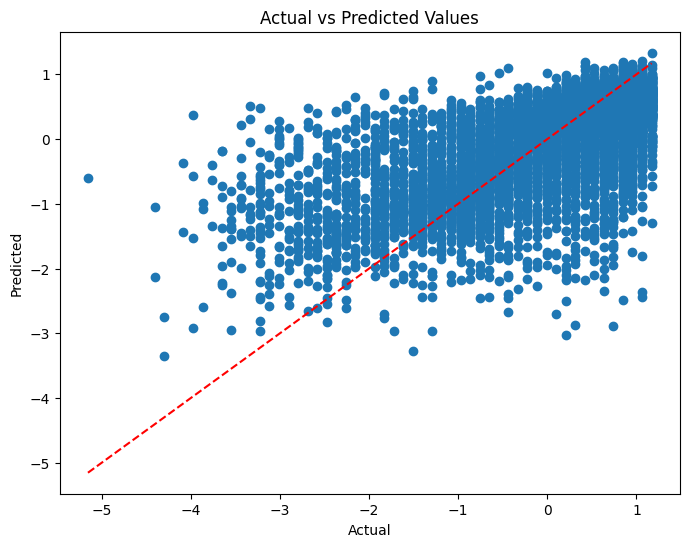

In [51]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print("\n=====Evaluasi Klasifikasi Model=====")
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")



=====Evaluasi Klasifikasi Model=====
Threshold: 0.0099
Accuracy : 0.7913
Precision: 0.8125
Recall   : 0.8480
F1 Score : 0.8299
AUC-ROC  : 0.8597


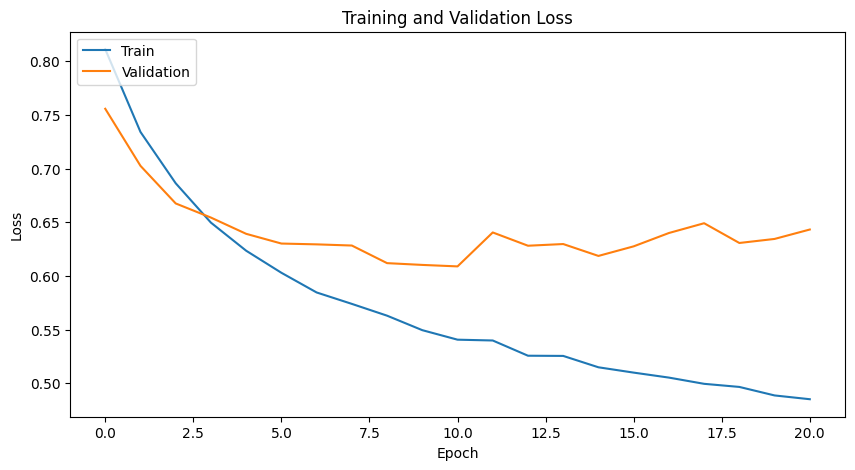

In [57]:


import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


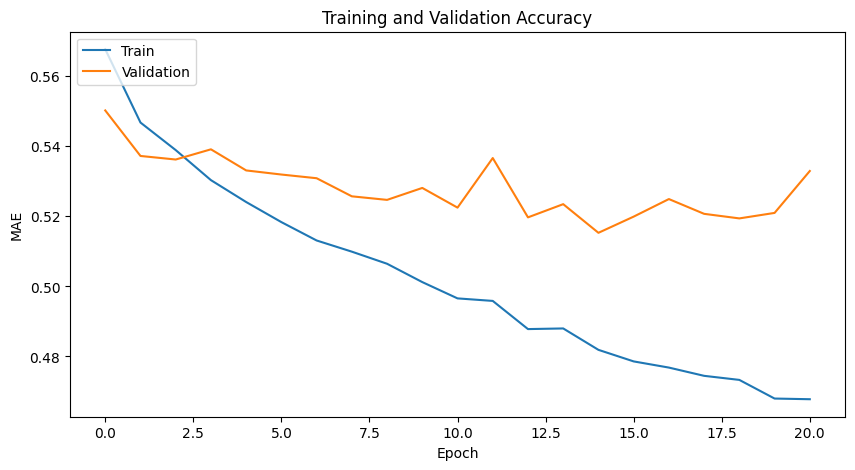

In [59]:


# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation Accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


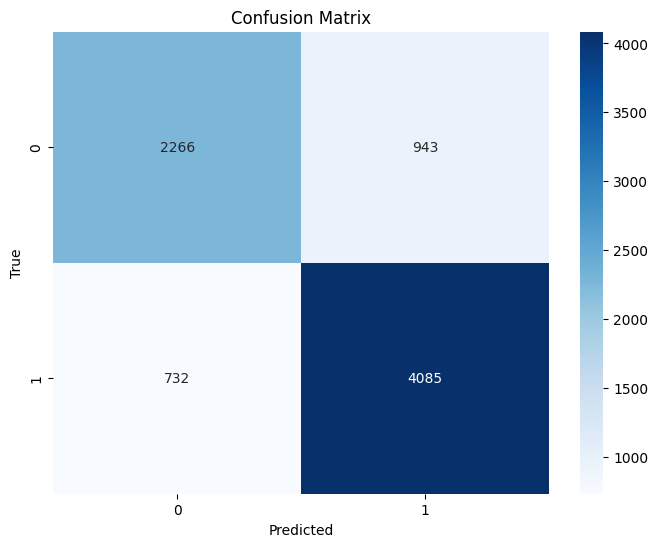

In [62]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true_class and y_pred_class are already defined from previous code
cm = confusion_matrix(y_true_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


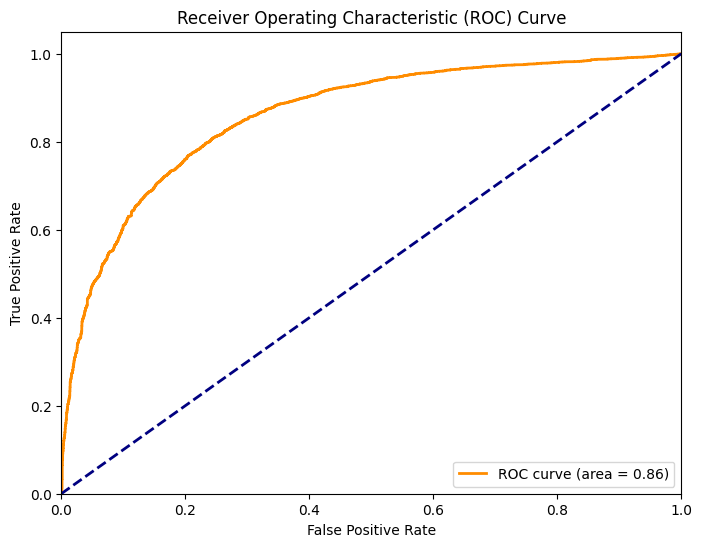

In [63]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test_scaled and y_pred are already defined from previous code

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_class, y_pred.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
